In [1]:
#https://github.com/NielsRogge/Transformers-Tutorials/blob/master/ViTMAE/ViT_MAE_visualization_demo.ipynb

In [2]:

from transformers import ViTFeatureExtractor
import requests
from PIL import Image

feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base")

/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [3]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

output_dir = '/home/maria/AllenData'
manifest_path = os.path.join(output_dir, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
session=cache.get_session_data(746083955)
lfp = session.get_lfp(760647907)

/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1

In [31]:
url = "https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg"
image = Image.open(requests.get(url, stream=True).raw)
print(np.array(image).shape)    

(224, 224, 3)


In [33]:
print(np.array(image))

[[[254 255 235]
  [152 130 107]
  [ 27  27   3]
  ...
  [ 98  87  59]
  [ 98  87  59]
  [ 98  87  59]]

 [[253 255 227]
  [146 123  92]
  [ 31  31   5]
  ...
  [ 96  87  58]
  [ 98  89  60]
  [ 99  90  61]]

 [[255 255 225]
  [142 119  85]
  [ 28  31   2]
  ...
  [ 97  88  57]
  [ 98  89  58]
  [ 98  89  60]]

 ...

 [[112  69  34]
  [ 47  32  11]
  [ 46  38  19]
  ...
  [ 70  75  45]
  [ 88  91  62]
  [110 113  82]]

 [[146  90  55]
  [ 99  67  44]
  [ 52  35  19]
  ...
  [108 105  74]
  [101  87  60]
  [110  93  67]]

 [[170 110  73]
  [104  78  45]
  [ 32  26   4]
  ...
  [113 104  75]
  [ 94  77  49]
  [104  85  55]]]


(12097852, 88)


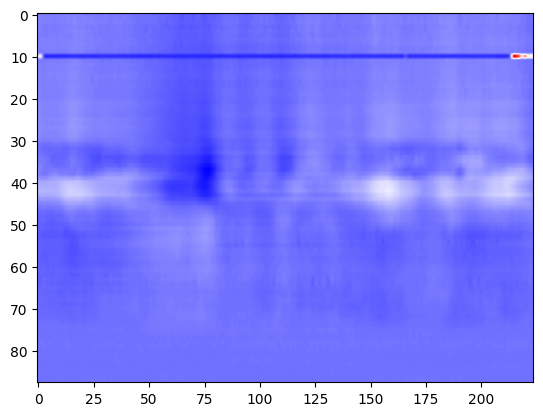

In [14]:
print(lfp.shape)

image=lfp[224:224+224, :]
plt.imshow(image.T, cmap='bwr', aspect='auto')

(12097852, 88)
(224, 88)


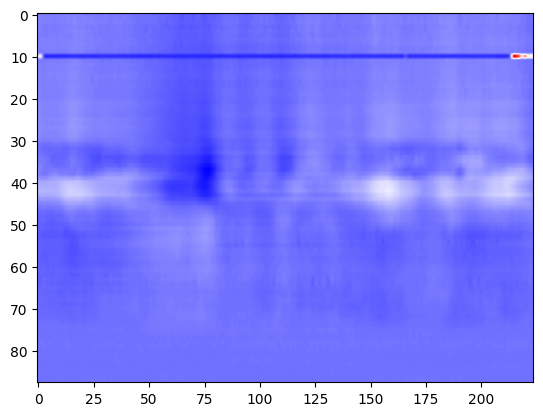

(224, 88, 3)


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming lfp is already defined as a 2D array
print(lfp.shape)

# Extracting the image
image = lfp[224:224+224, :]  # Adjust based on your needs

# Check that image is 2D
print(image.shape)  # Should print something like (224, X)

# Add a third dimension (channel) and repeat the image along this new dimension
channels = 3  # Number of repetitions along the new (channel) dimension

# First, add the third dimension with np.newaxis, then repeat along that new axis
image=  np.array(image).reshape(image.shape[0], image.shape[1], 1)
image_repeated = np.repeat(image,3, axis=2)

# Plotting one channel for visualization
plt.imshow(image_repeated[:, :, 0].T, cmap='bwr', aspect='auto')
plt.show()

# Check the shape to confirm it is now (height, width, channels)
print(image_repeated.shape)




In [34]:
image=image_repeated
min_val = image_repeated.min()
max_val = image_repeated.max()
image_rescaled = (image_repeated - min_val) / (max_val - min_val)
image=image_rescaled*255

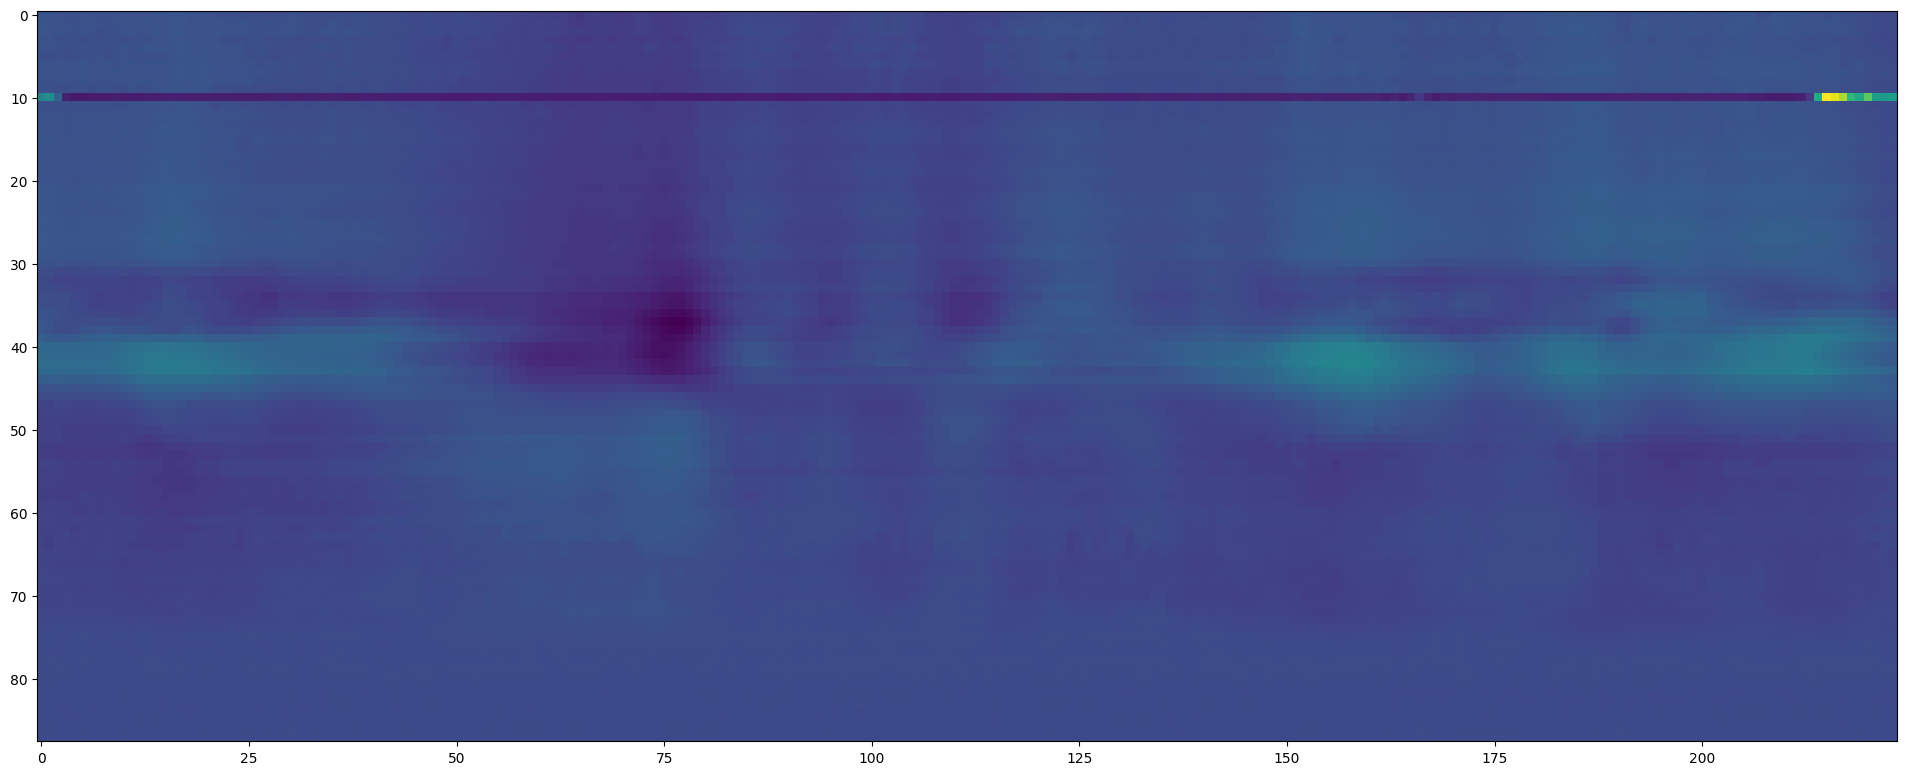

In [35]:
plt.imshow(image[:,:,0].T)

In [36]:
#url = "https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg"
#image = Image.open(requests.get(url, stream=True).raw)


pixel_values = feature_extractor(image, return_tensors="pt").pixel_values
     


ValueError: The image to be converted to a PIL image contains values outside the range [0, 1], got [0.0, 255.0] which cannot be converted to uint8.

/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


torch.Size([1, 196, 768])
tensor([[[[-1.0219, -1.0219, -1.0219,  ..., -1.1418, -1.1418, -1.1418],
          [-1.0219, -1.0219, -1.0219,  ..., -1.1418, -1.1418, -1.1418],
          [-1.0390, -1.0390, -1.0390,  ..., -1.1418, -1.1418, -1.1418],
          ...,
          [-1.1760, -1.1760, -1.1589,  ..., -1.1418, -1.1418, -1.1418],
          [-1.1760, -1.1760, -1.1760,  ..., -1.1418, -1.1418, -1.1418],
          [-1.1418, -1.1418, -1.1418,  ..., -1.1418, -1.1418, -1.1418]],

         [[-0.9153, -0.9153, -0.9153,  ..., -1.0378, -1.0378, -1.0378],
          [-0.9153, -0.9153, -0.9153,  ..., -1.0378, -1.0378, -1.0378],
          [-0.9328, -0.9328, -0.9328,  ..., -1.0378, -1.0378, -1.0378],
          ...,
          [-1.0728, -1.0728, -1.0553,  ..., -1.0378, -1.0378, -1.0378],
          [-1.0728, -1.0728, -1.0728,  ..., -1.0378, -1.0378, -1.0378],
          [-1.0378, -1.0378, -1.0378,  ..., -1.0378, -1.0378, -1.0378]],

         [[-0.6890, -0.6890, -0.6890,  ..., -0.8110, -0.8110, -0.8110],
    

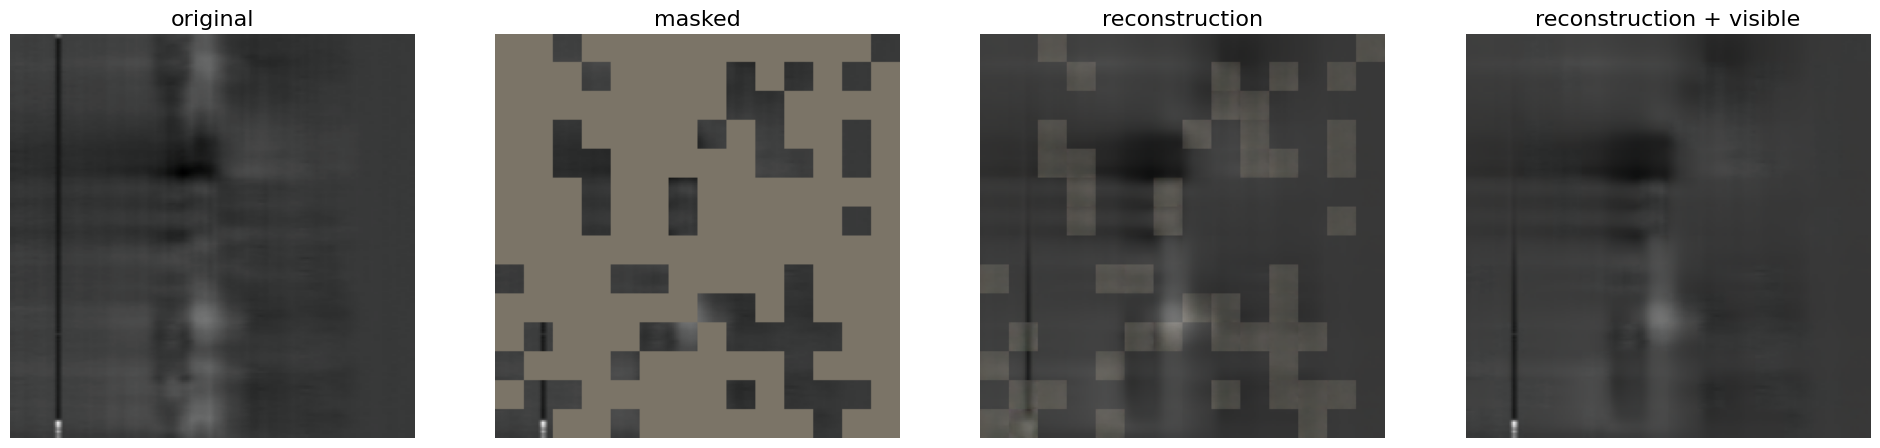

In [47]:


import torch
import numpy as np
import matplotlib.pyplot as plt

url = "https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg"
image1 = Image.open(requests.get(url, stream=True).raw)
image=image_repeated
min_val = image_repeated.min()
max_val = image_repeated.max()
image_rescaled = (image_repeated - min_val) / (max_val - min_val)
#image=image_rescaled*255
image_8bit = (image_rescaled * 255).astype(np.uint8)

# Convert the NumPy array into a PIL image object
pil_image = Image.fromarray(image_8bit)

# Optional: Display the PIL image
pil_image.show()
#print(image,image1)
pixel_values = feature_extractor(pil_image, return_tensors="pt").pixel_values

imagenet_mean = np.array(feature_extractor.image_mean)
imagenet_std = np.array(feature_extractor.image_std)

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def visualize(pixel_values, model):
    # forward pass
    outputs = model(pixel_values)
    print(outputs.logits.shape)
    print(pixel_values)
    y = model.unpatchify(outputs.logits)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()
    
    # visualize the mask
    mask = outputs.mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', pixel_values)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()
     

from transformers import ViTMAEForPreTraining

# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)

model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

visualize(pixel_values, model)
     
